In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('training_data/250820/test_combined.csv')

In [3]:
dataset.dtypes

Stack Voltage(V)       float64
Stack Current(A)       float64
Stack Temperatur(C)      int64
Istwert Durchfluss     float64
dtype: object

In [4]:
X = dataset.iloc[:, 1:].values
y = dataset.iloc[:, 0].values

In [5]:
X

array([[ 0. , 27. ,  0. ],
       [ 0. , 27. ,  0. ],
       [ 0. , 27. ,  0. ],
       ...,
       [ 0.3, 30. ,  0. ],
       [ 0.3, 30. ,  0. ],
       [ 0.3, 30. ,  0. ]])

In [6]:
y

array([19.769231, 19.769231, 19.769231, ..., 16.615385, 16.615385,
       16.615385])

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [8]:
X_train

array([[ 0.        , 31.        ,  0.        ],
       [ 0.5       , 34.        ,  0.        ],
       [ 0.2       , 28.        ,  0.09487634],
       ...,
       [ 0.5       , 33.        ,  0.        ],
       [ 0.4       , 34.        ,  0.1014856 ],
       [ 0.4       , 32.        ,  0.        ]])

In [9]:
X_test

array([[ 6.       , 30.       ,  0.       ],
       [ 0.5      , 33.       ,  0.       ],
       [ 2.8      , 31.       ,  0.1014856],
       ...,
       [ 0.4      , 32.       ,  1.618058 ],
       [ 2.3      , 33.       ,  0.       ],
       [ 0.2      , 29.       ,  0.1014856]])

In [10]:
y_train



array([19.384615, 16.615385, 17.      , ..., 16.615385, 16.846154,
       16.615385])

In [11]:
y_test

array([12.846154, 16.615385, 14.384615, ..., 16.615385, 14.846154,
       17.      ])

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
yscaler = StandardScaler()
y_train = yscaler.fit_transform(y_train.reshape(-1, 1))
y_test= yscaler.transform(y_test.reshape(-1, 1))

In [13]:
X_train

array([[-0.67589467, -0.08273056, -0.35668696],
       [-0.38518772,  0.82061812, -0.35668696],
       [-0.55961189, -0.98607925, -0.13386222],
       ...,
       [-0.38518772,  0.51950189, -0.35668696],
       [-0.44332911,  0.82061812, -0.11833984],
       [-0.44332911,  0.21838566, -0.35668696]])

In [14]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential(
    [
        layers.Dense(3, activation="sigmoid", name="layer1"),
        layers.Dense(3, activation="sigmoid", name="layer2"),
        layers.Dense(1, name="layer3"),
    ]
)
model.compile(optimizer="adam", loss = 'binary_crossentropy', metrics = ['accuracy'])

C:\Users\steph\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\steph\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\steph\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\steph\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


C:\Users\steph\anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\steph\anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\steph\anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\steph\anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.

In [15]:
model.fit(X_train, y_train, batch_size=32, epochs=1000)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/1000
28772/28772 [==============================] - 1s 26us/sample - loss: -1.4200e-07 - acc: 0.0000e+00
Epoch 2/1000
28772/28772 [==============================] - 1s 22us/sample - loss: -1.3901e-07 - acc: 0.0000e+00
Epoch 3/1000
28772/28772 [==============================] - 1s 22us/sample - loss: -1.5015e-07 - acc: 0.0000e+00
Epoch 4/1000
28772/28772 [==============================] - 1s 23us/sample - loss: -1.3930e-07 - acc: 0.0000e+00
Epoch 5/1000
28772/28772 [==============================] - 1s 22us/sample - loss: -1.4606e-07 - acc: 0.0000e+00
Epoch 6/1000
28772/28772 [==============================] - 1s 22us/sample - loss: -1.5245e-07 - acc: 0.0000e+00
Epoch 7/1000
28772/28772 [==============================] - 1s 23us/sample - loss: -1.4073e-07 - acc: 0.0000e+00
Epoch 8/1000
28772/28772 [==============================] - 1s 23us/sample - loss: -1.4220e-07 - acc: 0.0000e+00
Ep

28772/28772 [==============================] - 1s 27us/sample - loss: -1.4801e-07 - acc: 0.0000e+00
Epoch 70/1000
28772/28772 [==============================] - 1s 27us/sample - loss: -1.2885e-07 - acc: 0.0000e+00loss: 0.
Epoch 71/1000
28772/28772 [==============================] - 1s 27us/sample - loss: -1.5227e-07 - acc: 0.0000e+00
Epoch 72/1000
28772/28772 [==============================] - 1s 27us/sample - loss: -1.4452e-07 - acc: 0.0000e+00
Epoch 73/1000
28772/28772 [==============================] - 1s 27us/sample - loss: -1.4347e-07 - acc: 0.0000e+00
Epoch 74/1000
28772/28772 [==============================] - 1s 28us/sample - loss: -1.4825e-07 - acc: 0.0000e+00
Epoch 75/1000
28772/28772 [==============================] - 1s 27us/sample - loss: -1.3886e-07 - acc: 0.0000e+00
Epoch 76/1000
28772/28772 [==============================] - 1s 27us/sample - loss: -1.3384e-07 - acc: 0.0000e+00
Epoch 77/1000
28772/28772 [==============================] - 1s 27us/sample - loss: -1.5156e-0

28772/28772 [==============================] - 1s 22us/sample - loss: -1.4472e-07 - acc: 0.0000e+00
Epoch 141/1000
28772/28772 [==============================] - 1s 26us/sample - loss: -1.4220e-07 - acc: 0.0000e+00
Epoch 142/1000
28772/28772 [==============================] - 1s 27us/sample - loss: -1.4519e-07 - acc: 0.0000e+00
Epoch 143/1000
28772/28772 [==============================] - 1s 27us/sample - loss: -1.4588e-07 - acc: 0.0000e+00
Epoch 144/1000
28772/28772 [==============================] - 1s 27us/sample - loss: -1.4948e-07 - acc: 0.0000e+00
Epoch 145/1000
28772/28772 [==============================] - 1s 27us/sample - loss: -1.3399e-07 - acc: 0.0000e+00
Epoch 146/1000
28772/28772 [==============================] - 1s 28us/sample - loss: -1.3085e-07 - acc: 0.0000e+00
Epoch 147/1000
28772/28772 [==============================] - 1s 27us/sample - loss: -1.4829e-07 - acc: 0.0000e+00
Epoch 148/1000
28772/28772 [==============================] - 1s 27us/sample - loss: -1.4404e-0

28772/28772 [==============================] - 1s 23us/sample - loss: -1.4483e-07 - acc: 0.0000e+00
Epoch 212/1000
28772/28772 [==============================] - 1s 22us/sample - loss: -1.4259e-07 - acc: 0.0000e+00
Epoch 213/1000
28772/28772 [==============================] - 1s 22us/sample - loss: -1.4804e-07 - acc: 0.0000e+00
Epoch 214/1000
28772/28772 [==============================] - 1s 22us/sample - loss: -1.3865e-07 - acc: 0.0000e+00
Epoch 215/1000
28772/28772 [==============================] - 1s 22us/sample - loss: -1.4253e-07 - acc: 0.0000e+00
Epoch 216/1000
28772/28772 [==============================] - 1s 22us/sample - loss: -1.3305e-07 - acc: 0.0000e+00
Epoch 217/1000
28772/28772 [==============================] - 1s 22us/sample - loss: -1.4672e-07 - acc: 0.0000e+00
Epoch 218/1000
28772/28772 [==============================] - 1s 22us/sample - loss: -1.4017e-07 - acc: 0.0000e+00
Epoch 219/1000
28772/28772 [==============================] - 1s 22us/sample - loss: -1.3442e-0

28772/28772 [==============================] - 1s 22us/sample - loss: -1.4221e-07 - acc: 0.0000e+00
Epoch 283/1000
28772/28772 [==============================] - 1s 22us/sample - loss: -1.4067e-07 - acc: 0.0000e+00
Epoch 284/1000
28772/28772 [==============================] - 1s 22us/sample - loss: -1.4829e-07 - acc: 0.0000e+00
Epoch 285/1000
28772/28772 [==============================] - 1s 22us/sample - loss: -1.4453e-07 - acc: 0.0000e+00
Epoch 286/1000
28772/28772 [==============================] - 1s 22us/sample - loss: -1.3509e-07 - acc: 0.0000e+00
Epoch 287/1000
28772/28772 [==============================] - 1s 22us/sample - loss: -1.3943e-07 - acc: 0.0000e+00
Epoch 288/1000
28772/28772 [==============================] - 1s 22us/sample - loss: -1.4493e-07 - acc: 0.0000e+00
Epoch 289/1000
28772/28772 [==============================] - 1s 22us/sample - loss: -1.4114e-07 - acc: 0.0000e+00
Epoch 290/1000
28772/28772 [==============================] - 1s 22us/sample - loss: -1.3935e-0

28772/28772 [==============================] - 1s 22us/sample - loss: -1.3654e-07 - acc: 0.0000e+00
Epoch 354/1000
28772/28772 [==============================] - 1s 22us/sample - loss: -1.3819e-07 - acc: 0.0000e+00
Epoch 355/1000
28772/28772 [==============================] - 1s 22us/sample - loss: -1.5113e-07 - acc: 0.0000e+00
Epoch 356/1000
28772/28772 [==============================] - 1s 22us/sample - loss: -1.4236e-07 - acc: 0.0000e+00
Epoch 357/1000
28772/28772 [==============================] - 1s 22us/sample - loss: -1.4589e-07 - acc: 0.0000e+00
Epoch 358/1000
28772/28772 [==============================] - 1s 22us/sample - loss: -1.4022e-07 - acc: 0.0000e+00
Epoch 359/1000
28772/28772 [==============================] - 1s 22us/sample - loss: -1.4957e-07 - acc: 0.0000e+00
Epoch 360/1000
28772/28772 [==============================] - 1s 22us/sample - loss: -1.4215e-07 - acc: 0.0000e+00
Epoch 361/1000
28772/28772 [==============================] - 1s 22us/sample - loss: -1.4687e-0

Epoch 424/1000
28772/28772 [==============================] - 1s 22us/sample - loss: -1.3513e-07 - acc: 0.0000e+00
Epoch 425/1000
28772/28772 [==============================] - 1s 22us/sample - loss: -1.4531e-07 - acc: 0.0000e+00
Epoch 426/1000
28772/28772 [==============================] - 1s 22us/sample - loss: -1.3988e-07 - acc: 0.0000e+00
Epoch 427/1000
28772/28772 [==============================] - 1s 22us/sample - loss: -1.3296e-07 - acc: 0.0000e+00
Epoch 428/1000
28772/28772 [==============================] - 1s 22us/sample - loss: -1.3649e-07 - acc: 0.0000e+00
Epoch 429/1000
28772/28772 [==============================] - 1s 22us/sample - loss: -1.5068e-07 - acc: 0.0000e+00
Epoch 430/1000
28772/28772 [==============================] - 1s 22us/sample - loss: -1.4496e-07 - acc: 0.0000e+00
Epoch 431/1000
28772/28772 [==============================] - 1s 22us/sample - loss: -1.4422e-07 - acc: 0.0000e+00
Epoch 432/1000
28772/28772 [==============================] - 1s 22us/sample - l

28772/28772 [==============================] - 1s 22us/sample - loss: -1.4707e-07 - acc: 0.0000e+00
Epoch 496/1000
28772/28772 [==============================] - 1s 22us/sample - loss: -1.3732e-07 - acc: 0.0000e+00
Epoch 497/1000
28772/28772 [==============================] - 1s 22us/sample - loss: -1.4493e-07 - acc: 0.0000e+00
Epoch 498/1000
28772/28772 [==============================] - 1s 22us/sample - loss: -1.4869e-07 - acc: 0.0000e+00
Epoch 499/1000
28772/28772 [==============================] - 1s 22us/sample - loss: -1.4127e-07 - acc: 0.0000e+00
Epoch 500/1000
28772/28772 [==============================] - 1s 22us/sample - loss: -1.4127e-07 - acc: 0.0000e+00
Epoch 501/1000
28772/28772 [==============================] - 1s 22us/sample - loss: -1.3848e-07 - acc: 0.0000e+00
Epoch 502/1000
28772/28772 [==============================] - 1s 22us/sample - loss: -1.5672e-07 - acc: 0.0000e+00
Epoch 503/1000
28772/28772 [==============================] - 1s 22us/sample - loss: -1.2851e-0

28772/28772 [==============================] - 1s 23us/sample - loss: -1.4775e-07 - acc: 0.0000e+00
Epoch 567/1000
28772/28772 [==============================] - 1s 22us/sample - loss: -1.5600e-07 - acc: 0.0000e+00
Epoch 568/1000
28772/28772 [==============================] - 1s 22us/sample - loss: -1.3480e-07 - acc: 0.0000e+00
Epoch 569/1000
28772/28772 [==============================] - 1s 22us/sample - loss: -1.4520e-07 - acc: 0.0000e+00
Epoch 570/1000
28772/28772 [==============================] - 1s 22us/sample - loss: -1.4740e-07 - acc: 0.0000e+00
Epoch 571/1000
28772/28772 [==============================] - 1s 22us/sample - loss: -1.5247e-07 - acc: 0.0000e+00
Epoch 572/1000
28772/28772 [==============================] - 1s 22us/sample - loss: -1.5429e-07 - acc: 0.0000e+00
Epoch 573/1000
28772/28772 [==============================] - 1s 22us/sample - loss: -1.4664e-07 - acc: 0.0000e+00
Epoch 574/1000
28772/28772 [==============================] - 1s 22us/sample - loss: -1.3258e-0

28772/28772 [==============================] - 1s 22us/sample - loss: -1.3794e-07 - acc: 0.0000e+00
Epoch 638/1000
28772/28772 [==============================] - 1s 22us/sample - loss: -1.4221e-07 - acc: 0.0000e+00
Epoch 639/1000
28772/28772 [==============================] - 1s 22us/sample - loss: -1.4082e-07 - acc: 0.0000e+00
Epoch 640/1000
28772/28772 [==============================] - 1s 22us/sample - loss: -1.4417e-07 - acc: 0.0000e+00
Epoch 641/1000
28772/28772 [==============================] - 1s 22us/sample - loss: -1.4989e-07 - acc: 0.0000e+00
Epoch 642/1000
28772/28772 [==============================] - 1s 22us/sample - loss: -1.4553e-07 - acc: 0.0000e+00
Epoch 643/1000
28772/28772 [==============================] - 1s 22us/sample - loss: -1.4312e-07 - acc: 0.0000e+00
Epoch 644/1000
28772/28772 [==============================] - 1s 27us/sample - loss: -1.5187e-07 - acc: 0.0000e+00
Epoch 645/1000
28772/28772 [==============================] - 1s 23us/sample - loss: -1.4435e-0

28772/28772 [==============================] - 1s 22us/sample - loss: -1.5235e-07 - acc: 0.0000e+00
Epoch 709/1000
28772/28772 [==============================] - 1s 22us/sample - loss: -1.3596e-07 - acc: 0.0000e+00
Epoch 710/1000
28772/28772 [==============================] - 1s 22us/sample - loss: -1.3867e-07 - acc: 0.0000e+00
Epoch 711/1000
28772/28772 [==============================] - 1s 22us/sample - loss: -1.3578e-07 - acc: 0.0000e+00
Epoch 712/1000
28772/28772 [==============================] - 1s 22us/sample - loss: -1.4689e-07 - acc: 0.0000e+00
Epoch 713/1000
28772/28772 [==============================] - 1s 22us/sample - loss: -1.4919e-07 - acc: 0.0000e+00
Epoch 714/1000
28772/28772 [==============================] - 1s 22us/sample - loss: -1.5018e-07 - acc: 0.0000e+00
Epoch 715/1000
28772/28772 [==============================] - 1s 22us/sample - loss: -1.4447e-07 - acc: 0.0000e+00
Epoch 716/1000
28772/28772 [==============================] - 1s 22us/sample - loss: -1.4937e-0

28772/28772 [==============================] - 1s 23us/sample - loss: -1.4592e-07 - acc: 0.0000e+00
Epoch 780/1000
28772/28772 [==============================] - 1s 23us/sample - loss: -1.4299e-07 - acc: 0.0000e+00
Epoch 781/1000
28772/28772 [==============================] - 1s 23us/sample - loss: -1.4665e-07 - acc: 0.0000e+00
Epoch 782/1000
28772/28772 [==============================] - 1s 23us/sample - loss: -1.4268e-07 - acc: 0.0000e+00
Epoch 783/1000
28772/28772 [==============================] - 1s 23us/sample - loss: -1.3828e-07 - acc: 0.0000e+00
Epoch 784/1000
28772/28772 [==============================] - 1s 23us/sample - loss: -1.4243e-07 - acc: 0.0000e+00
Epoch 785/1000
28772/28772 [==============================] - 1s 23us/sample - loss: -1.4188e-07 - acc: 0.0000e+00
Epoch 786/1000
28772/28772 [==============================] - 1s 23us/sample - loss: -1.4206e-07 - acc: 0.0000e+00
Epoch 787/1000
28772/28772 [==============================] - 1s 23us/sample - loss: -1.5168e-0

28772/28772 [==============================] - 1s 23us/sample - loss: -1.4362e-07 - acc: 0.0000e+00
Epoch 851/1000
28772/28772 [==============================] - 1s 23us/sample - loss: -1.3855e-07 - acc: 0.0000e+00
Epoch 852/1000
28772/28772 [==============================] - 1s 23us/sample - loss: -1.4047e-07 - acc: 0.0000e+00
Epoch 853/1000
28772/28772 [==============================] - 1s 23us/sample - loss: -1.4085e-07 - acc: 0.0000e+00
Epoch 854/1000
28772/28772 [==============================] - 1s 23us/sample - loss: -1.3954e-07 - acc: 0.0000e+00
Epoch 855/1000
28772/28772 [==============================] - 1s 23us/sample - loss: -1.4344e-07 - acc: 0.0000e+00
Epoch 856/1000
28772/28772 [==============================] - 1s 23us/sample - loss: -1.4892e-07 - acc: 0.0000e+00
Epoch 857/1000
28772/28772 [==============================] - 1s 23us/sample - loss: -1.3658e-07 - acc: 0.0000e+00
Epoch 858/1000
28772/28772 [==============================] - 1s 23us/sample - loss: -1.5240e-0

28772/28772 [==============================] - 1s 23us/sample - loss: -1.4051e-07 - acc: 0.0000e+00
Epoch 922/1000
28772/28772 [==============================] - 1s 23us/sample - loss: -1.5158e-07 - acc: 0.0000e+00
Epoch 923/1000
28772/28772 [==============================] - 1s 23us/sample - loss: -1.4578e-07 - acc: 0.0000e+00
Epoch 924/1000
28772/28772 [==============================] - 1s 23us/sample - loss: -1.3202e-07 - acc: 0.0000e+00
Epoch 925/1000
28772/28772 [==============================] - 1s 23us/sample - loss: -1.4026e-07 - acc: 0.0000e+00
Epoch 926/1000
28772/28772 [==============================] - 1s 23us/sample - loss: -1.4205e-07 - acc: 0.0000e+00
Epoch 927/1000
28772/28772 [==============================] - 1s 23us/sample - loss: -1.4095e-07 - acc: 0.0000e+00
Epoch 928/1000
28772/28772 [==============================] - 1s 23us/sample - loss: -1.5650e-07 - acc: 0.0000e+00
Epoch 929/1000
28772/28772 [==============================] - 1s 23us/sample - loss: -1.3621e-0

28772/28772 [==============================] - 1s 23us/sample - loss: -1.4244e-07 - acc: 0.0000e+00
Epoch 993/1000
28772/28772 [==============================] - 1s 23us/sample - loss: -1.4868e-07 - acc: 0.0000e+00
Epoch 994/1000
28772/28772 [==============================] - 1s 24us/sample - loss: -1.4090e-07 - acc: 0.0000e+00
Epoch 995/1000
28772/28772 [==============================] - 1s 23us/sample - loss: -1.3860e-07 - acc: 0.0000e+00
Epoch 996/1000
28772/28772 [==============================] - 1s 23us/sample - loss: -1.4921e-07 - acc: 0.0000e+00
Epoch 997/1000
28772/28772 [==============================] - 1s 23us/sample - loss: -1.3626e-07 - acc: 0.0000e+00
Epoch 998/1000
28772/28772 [==============================] - 1s 23us/sample - loss: -1.5454e-07 - acc: 0.0000e+00
Epoch 999/1000
28772/28772 [==============================] - 1s 23us/sample - loss: -1.4109e-07 - acc: 0.0000e+00
Epoch 1000/1000
28772/28772 [==============================] - 1s 23us/sample - loss: -1.4249e-

In [16]:
y_pred = model.predict(X_test)

In [17]:
from sklearn.metrics import mean_squared_error
me = mean_squared_error(y_test, y_pred)
print(me)

1.7690450402913245


Text(0, 0.5, 'actual')

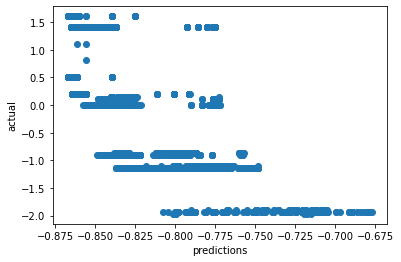

In [18]:
plt.scatter(y_pred, y_test)
plt.xlabel("predictions")
plt.ylabel("actual")

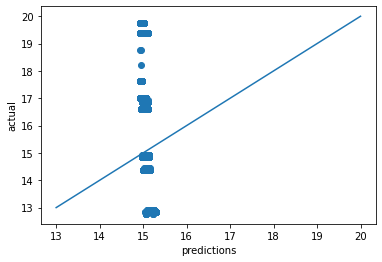

In [19]:
plt.scatter(yscaler.inverse_transform(y_pred),yscaler.inverse_transform(y_test))
plt.xlabel("predictions")
plt.ylabel("actual")
plt.plot([13, 20], [13, 20])


In [20]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

-0.7299695978295802